# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

# Load Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam, SGD

# Load Data

In [2]:
car_df = pd.read_csv('CarPrice_Assignment.csv')

# Check Missing Data

In [3]:
car_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Convert Non-numerical values into numerical values

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [4]:
car_df['fueltype'] = labelencoder.fit_transform(car_df['fueltype'])
car_df['aspiration'] = labelencoder.fit_transform(car_df['aspiration'])
car_df['doornumber'] = car_df['doornumber'].map({'two':2,'four':4})
car_df['carbody'] = labelencoder.fit_transform(car_df['carbody'])
car_df['drivewheel'] = labelencoder.fit_transform(car_df['drivewheel'])

car_df['enginelocation'] = car_df['enginelocation'].map({'front':1,'rear':2})
car_df['cylindernumber'] = car_df['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 
                                                         'two':2, 'eight':8})

car_df['enginetype'] = labelencoder.fit_transform(car_df['enginetype'])
car_df['fuelsystem'] = labelencoder.fit_transform(car_df['enginelocation'])

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [6]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,1,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,1,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,1,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,1,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,1,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


# Correlation Matrix

<AxesSubplot:>

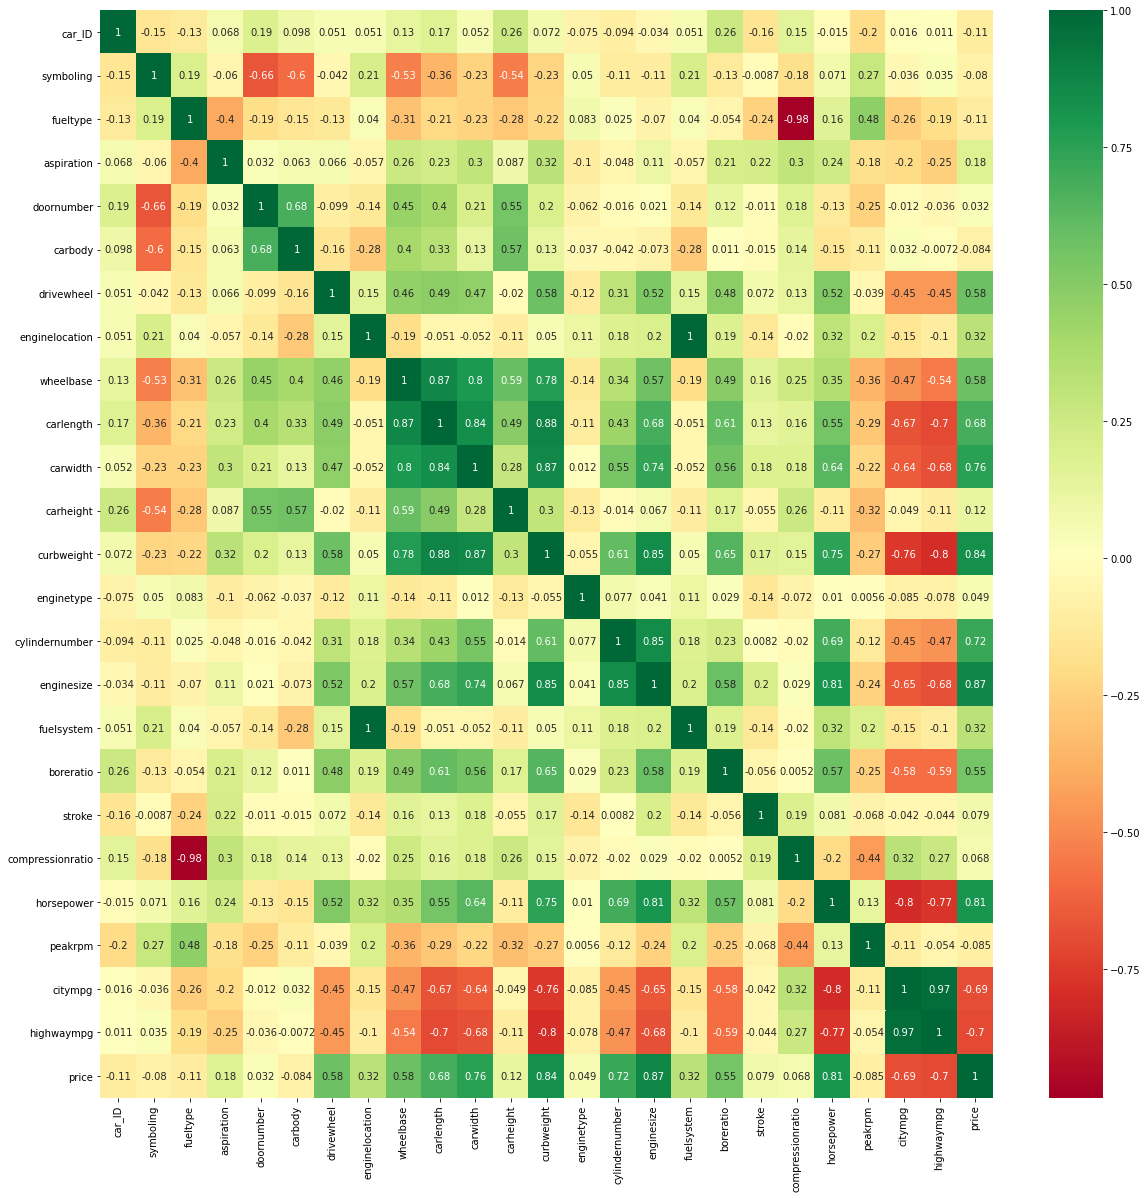

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(car_df.corr(),annot=True,cmap="RdYlGn")

# Select Feautures with highest +ve and -ve Correlation

In [7]:
car_df.corr()['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.718305
carlength           0.682920
drivewheel          0.577992
wheelbase           0.577816
boreratio           0.553173
enginelocation      0.324973
fuelsystem          0.324973
aspiration          0.177926
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
enginetype          0.049171
doornumber          0.031835
symboling          -0.079978
carbody            -0.083976
peakrpm            -0.085267
fueltype           -0.105679
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [8]:
car = car_df[['drivewheel','enginelocation','wheelbase','carlength','carwidth','curbweight','cylindernumber','enginesize',
              'fuelsystem','fuelsystem','boreratio','horsepower','citympg','highwaympg','price']]

In [9]:
car.head()

,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,2,1,88.6,168.8,64.1,2548,4,130,0,0,3.47,111,21,27,13495.0
1,2,1,88.6,168.8,64.1,2548,4,130,0,0,3.47,111,21,27,16500.0
2,2,1,94.5,171.2,65.5,2823,6,152,0,0,2.68,154,19,26,16500.0
3,1,1,99.8,176.6,66.2,2337,4,109,0,0,3.19,102,24,30,13950.0
4,0,1,99.4,176.6,66.4,2824,5,136,0,0,3.19,115,18,22,17450.0


# Split Data into Train, Test and Validation

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = (car.loc[:, car.columns != 'price'])
y = (car.loc[:, car.columns == 'price'])

In [12]:
# Split to 50% Train and 50% Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)

# Split 50% Test into further 30% Test and 20% Validation
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.40, random_state=42)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(102, 14)
(61, 14)
(42, 14)


In [14]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(102, 1)
(61, 1)
(42, 1)


# Use Min Max Scaler to Scale all Features

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Use MinMax Scaller to scale all features
min_max_scaler = MinMaxScaler()

In [17]:
x_train_s = min_max_scaler.fit_transform(x_train)
x_test_s = min_max_scaler.fit_transform(x_test)
x_val_s = min_max_scaler.fit_transform(x_val)

y_train_s = min_max_scaler.fit_transform(y_train)
y_test_s = min_max_scaler.fit_transform(y_test)
y_val_s = min_max_scaler.fit_transform(y_val)

In [18]:
print(x_train_s.shape)
print(x_test_s.shape)
print(x_val_s.shape)

print(y_train_s.shape)
print(y_test_s.shape)
print(y_val_s.shape)

(102, 14)
(61, 14)
(42, 14)
(102, 1)
(61, 1)
(42, 1)


# Create Model

In [19]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 10, activation='relu', input_dim=14))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 6, activation='relu'))
model.add(Dense(units = 1, activation='relu'))

In [20]:
# Loss Function measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])

In [21]:
hist = model.fit(
    x_train_s, y_train_s, epochs = 100,
    validation_data = (x_val_s, y_val_s)
)

Epoch 1/100
4/4 [==============================] - 1s 292ms/step - loss: 0.0670 - mae: 0.1695 - val_loss: 0.0972 - val_mae: 0.1992
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0546 - mae: 0.1488 - val_loss: 0.0901 - val_mae: 0.1867
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0586 - mae: 0.1471 - val_loss: 0.0838 - val_mae: 0.1770
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0476 - mae: 0.1233 - val_loss: 0.0781 - val_mae: 0.1713
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0449 - mae: 0.1298 - val_loss: 0.0728 - val_mae: 0.1696
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0467 - mae: 0.1294 - val_loss: 0.0681 - val_mae: 0.1700
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0368 - mae: 0.1189 - val_loss: 0.0642 - val_mae: 0.1696
Epoch 8/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0330 - mae: 0.1

4/4 [==============================] - 0s 14ms/step - loss: 0.0068 - mae: 0.0587 - val_loss: 0.0131 - val_mae: 0.0972
Epoch 64/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0056 - mae: 0.0548 - val_loss: 0.0141 - val_mae: 0.1028
Epoch 65/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0052 - mae: 0.0529 - val_loss: 0.0148 - val_mae: 0.1068
Epoch 66/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0061 - mae: 0.0557 - val_loss: 0.0151 - val_mae: 0.1081
Epoch 67/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0060 - mae: 0.0559 - val_loss: 0.0152 - val_mae: 0.1089
Epoch 68/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0050 - mae: 0.0519 - val_loss: 0.0145 - val_mae: 0.1057
Epoch 69/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0053 - mae: 0.0535 - val_loss: 0.0140 - val_mae: 0.1028
Epoch 70/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0057 - mae: 0.0548 - 

# Check Model's Loss and Mean Absolute Error against Validation Data

In [22]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

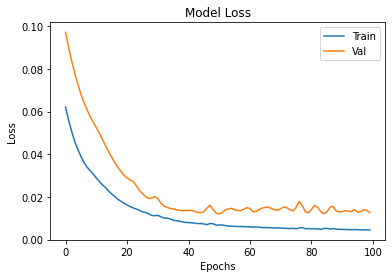

In [23]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

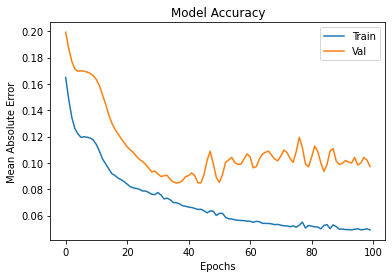

In [24]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["mae"])
plt.plot(hist.history["val_mae"])
plt.title('Model Accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# Retune Model based on number of Epocs, to get minimum Loss

In [39]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 10, activation='relu', input_dim=14))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 6, activation='relu'))
model.add(Dense(units = 1, activation='relu'))

In [40]:
# Loss Function measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])

In [41]:
hist = model.fit(
    x_train_s, y_train_s, epochs = 37,
    validation_data = (x_val_s, y_val_s)
)

Epoch 1/37
4/4 [==============================] - 1s 62ms/step - loss: 0.0543 - mae: 0.1729 - val_loss: 0.0639 - val_mae: 0.1912
Epoch 2/37
4/4 [==============================] - 0s 14ms/step - loss: 0.0499 - mae: 0.1665 - val_loss: 0.0462 - val_mae: 0.1666
Epoch 3/37
4/4 [==============================] - 0s 13ms/step - loss: 0.0304 - mae: 0.1288 - val_loss: 0.0308 - val_mae: 0.1335
Epoch 4/37
4/4 [==============================] - 0s 14ms/step - loss: 0.0243 - mae: 0.1095 - val_loss: 0.0186 - val_mae: 0.0987
Epoch 5/37
4/4 [==============================] - 0s 12ms/step - loss: 0.0153 - mae: 0.0852 - val_loss: 0.0140 - val_mae: 0.0812
Epoch 6/37
4/4 [==============================] - 0s 16ms/step - loss: 0.0166 - mae: 0.0891 - val_loss: 0.0130 - val_mae: 0.0763
Epoch 7/37
4/4 [==============================] - 0s 19ms/step - loss: 0.0180 - mae: 0.0901 - val_loss: 0.0125 - val_mae: 0.0751
Epoch 8/37
4/4 [==============================] - 0s 14ms/step - loss: 0.0181 - mae: 0.0875 - val

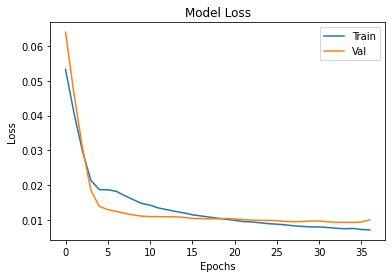

In [42]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

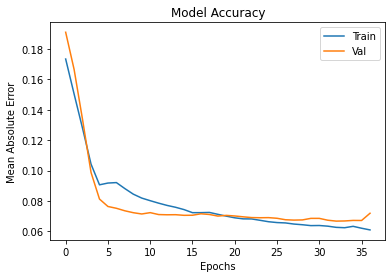

In [43]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["mae"])
plt.plot(hist.history["val_mae"])
plt.title('Model Accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# Get the Model's Predicted Values based on XTest data

In [44]:
predictions = model.predict(x_test_s)
predictions = min_max_scaler.inverse_transform(predictions)

In [45]:
print(len(predictions))
print(len(x_test_s))

61
61


In [46]:
predictions

array([[ 9704.911 ],
       [ 7910.277 ],
       [ 9190.988 ],
       [ 5884.812 ],
       [12117.161 ],
       [ 6569.806 ],
       [14694.835 ],
       [19972.979 ],
       [13395.267 ],
       [13047.211 ],
       [10844.279 ],
       [ 7916.8247],
       [10470.881 ],
       [13354.397 ],
       [ 6956.196 ],
       [ 7321.056 ],
       [ 7916.8247],
       [ 7178.0215],
       [15366.414 ],
       [ 7956.5957],
       [ 9647.3955],
       [10317.919 ],
       [11030.549 ],
       [ 7095.2153],
       [ 6857.9424],
       [10573.345 ],
       [ 7793.698 ],
       [ 7272.965 ],
       [15406.495 ],
       [14545.014 ],
       [12029.62  ],
       [11044.565 ],
       [20362.678 ],
       [13880.975 ],
       [20309.758 ],
       [ 7567.008 ],
       [ 8862.767 ],
       [ 8042.6387],
       [11344.569 ],
       [ 7389.4824],
       [12207.093 ],
       [ 7284.3994],
       [ 7567.008 ],
       [11461.5625],
       [10563.059 ],
       [ 7432.9067],
       [17422.566 ],
       [ 9240

In [47]:
y_test['price'].values

array([ 7689.   ,  9258.   ,  6918.   ,  7603.   , 13415.   ,  9960.   ,
       18150.   , 41315.   , 12764.   , 12964.   ,  9988.   ,  6692.   ,
       11850.   , 12629.   ,  8916.5  , 10198.   ,  7609.   ,  7788.   ,
       20970.   , 11259.   ,  6989.   ,  8449.   , 15510.   ,  7349.   ,
        6295.   , 10345.   ,  6229.   ,  6938.   , 17199.   , 18950.   ,
       18620.   , 18344.   , 37028.   , 16900.   , 34028.   , 11845.   ,
        9538.   ,  7898.   , 13845.   ,  5389.   , 16503.   ,  6377.   ,
       10945.   , 12940.   , 17859.167,  7099.   , 13499.   ,  9549.   ,
        6479.   ,  7609.   , 10595.   , 16695.   , 11048.   , 16845.   ,
        8495.   ,  9233.   , 18150.   , 40960.   , 17075.   , 16558.   ,
        8558.   ])

# Plot Data to See Variations in Predictions

In [48]:
y_train['Type'] = 'Train'

<ipython-input-48-0bb17de31fa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Type'] = 'Train'


In [49]:
y_test['Type'] = 'Test'

In [50]:
pred = pd.DataFrame(data = predictions,index = y_test.index, columns=['Predcited Price'])

In [51]:
plot = pd.DataFrame()
plot = pd.concat([y_train,y_test])
plot = plot.merge(pred,how='left',left_index=True, right_index=True)

In [52]:
plot

,price,Type,Predcited Price
126,32528.0,Train,NaN
196,15985.0,Train,NaN
141,7126.0,Train,NaN
4,17450.0,Train,NaN
32,5399.0,Train,NaN
...,...,...,...
136,18150.0,Test,11811.349609
73,40960.0,Test,26369.535156
114,17075.0,Test,15925.087891
178,16558.0,Test,17755.101562


In [53]:
plot_s = plot.reset_index()

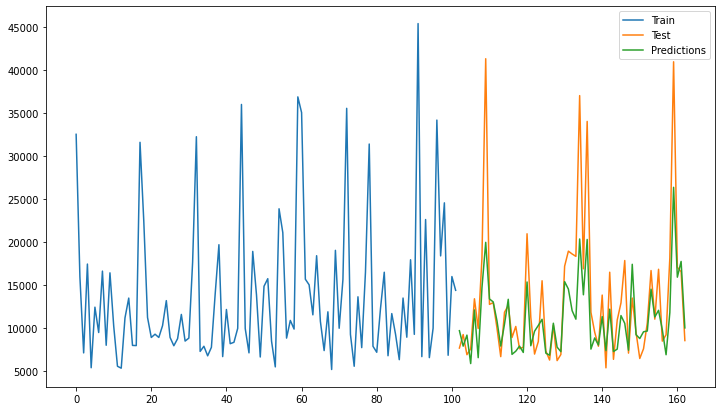

In [54]:
plt.figure(figsize=(12,7))
plt.plot(plot_s[plot_s.Type == 'Train']['price'],label='Train')
plt.plot(plot_s[plot_s.Type == 'Test']['price'],label='Test')
plt.plot(plot_s['Predcited Price'],label='Predictions')
plt.legend()
plt.show()